<a href="https://colab.research.google.com/github/Datamin-D/movie_predict/blob/master/%5Baward%20data-imdbpy%20/%20%EC%A4%91%EB%B3%B5%EC%B2%98%EB%A6%AC%20%EC%A0%84%5DMovie_predict_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing

##1.데이터 합치기 

26개 다운로드 후, **나 '추후에' 검색해서 바꾸기.

In [1]:
import pandas as pd
import numpy as np
import re
import pickle

!pip install git+https://github.com/alberanid/imdbpy #imdbpy 설치
from imdb import IMDb

  Cloning https://github.com/alberanid/imdbpy to /tmp/pip-req-build-1yvfto9k
  Running command git clone -q https://github.com/alberanid/imdbpy /tmp/pip-req-build-1yvfto9k
  Created wheel for IMDbPY: filename=IMDbPY-2020.8.12-cp36-none-any.whl size=302258 sha256=d8e6a8b594c8d7968fa56679d7a5ddd2158a7071544232e5816a716793c3e5ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-7xq_rp6i/wheels/0f/09/61/190df5e0276765680540f1562f2abca80e725a7e48595e993f
Successfully built IMDbPY


In [2]:
#구글드라이브 마운트
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [3]:
#1. 구글 드라이브에서 Movie_data 다운로드, 합치기 
df = pd.DataFrame()
df_list = []
[df_list.append("df"+str(df_no)) for df_no in range(26)]
print('df_list:',df_list)
df = pd.DataFrame(data = None) #첫번째 df. 빔. 빈 df 만들기: pd.DataFrame(data = None)

for data_ind, df_element in zip(range(26),df_list): #**추후에 바꿔 range(26)으로 #ZIP 함수를 활용해서 for i,j in zip(--,--): 이렇게 변수 두개 쓸 수도 있음. 
  #박사님's path = "/gdrive/My Drive/movie/"+"movie_data_"+str(data_ind)+".csv"
    path = "/gdrive/My Drive/movie_predict/movie_data_"+str(data_ind)+".csv"
    print("path:",path)
    print(df_element)


    df_element = pd.read_csv(path, index_col = "Movie_title") #pd.read_csv('폴더경로',index_col = "column이름") 
    print(df_element)
    df = pd.concat([df, df_element]) #df0,df1,df2,...
    

#df.describe()
df
  #이렇게 하면 df_list의 값에 바로 pd가 지정되는게 아니라 ex) 'df_list[data_ind]'가 pd로 지정됨. 각각 list안에값을 변수 이름으로 하고프면



df_list: ['df0', 'df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10', 'df11', 'df12', 'df13', 'df14', 'df15', 'df16', 'df17', 'df18', 'df19', 'df20', 'df21', 'df22', 'df23', 'df24', 'df25']
path: /gdrive/My Drive/movie_predict/movie_data_0.csv
df0
                            Unnamed: 0  ...   Domestic_distributor
Movie_title                             ...                       
American Animals (2018)              1  ...            The Orchard
Step Up Revolution (2012)            3  ...              Lionsgate
Bad News Bears (2005)                4  ...     Paramount Pictures
American Assassin (2017)             7  ...              Lionsgate
Ek Thi Daayan (2013)                13  ...     Eros International
...                                ...  ...                    ...
Committed (2000)                   991  ...                Miramax
The Expendables (2010)             992  ...              Lionsgate
Stop-Loss (2008)                   995  ...     Paramount Pictur

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"['Documentary', 'Biography', 'Crime']",['7.0'],"35,319",['1h 56min'],NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"['Drama', 'Music', 'Romance']",['6.4'],"52,827",['1h 39min'],"$33,000,000 (estimated)","$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"['Comedy', 'Sport']",['5.8'],"19,924",['1h 53min'],"$35,000,000 (estimated)","$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"['Action', 'Thriller']",['6.2'],"65,944",['1h 52min'],"$33,000,000 (estimated)","$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"['Horror', 'Romance', 'Thriller']",['5.7'],"3,770",['2h 15min'],NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,['Documentary'],['7.6'],538,['1h 22min'],NaN,"$14,289","$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"['Drama', 'Romance']",['8.0'],"8,544",['1h 45min'],NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,['Horror'],['5.6'],"96,796",['1h 31min'],"$3,000,000 (estimated)","$84,752,907","$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


In [4]:
#잘 불러왔나 new로 실험

#1. 구글 드라이브에서 Movie_data 다운로드, 합치기 
df = pd.DataFrame()
df_list = []
[df_list.append("df"+str(df_no)) for df_no in range(26)]
print('df_list:',df_list)
df = pd.DataFrame(data = None) #첫번째 df. 빔. 빈 df 만들기: pd.DataFrame(data = None)

for data_ind, df_element in zip(range(26),df_list): #**추후에 바꿔 range(26)으로 #ZIP 함수를 활용해서 for i,j in zip(--,--): 이렇게 변수 두개 쓸 수도 있음. 
  #박사님's path = "/gdrive/My Drive/movie/"+"movie_data_"+str(data_ind)+".csv"
  path = "/gdrive/My Drive/movie_predict/movie_data_new/movie_data_"+str(data_ind)+".csv"
  print("path:",path)
  print(df_element)


  df_element = pd.read_csv(path, index_col = "Movie_title") #pd.read_csv('폴더경로',index_col = "column이름") 
  print(df_element)
  df = pd.concat([df, df_element]) #df0,df1,df2,...


#df.describe()
df
  #이렇게 하면 df_list의 값에 바로 pd가 지정되는게 아니라 ex) 'df_list[data_ind]'가 pd로 지정됨. 각각 list안에값을 변수 이름으로 하고프면



df_list: ['df0', 'df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10', 'df11', 'df12', 'df13', 'df14', 'df15', 'df16', 'df17', 'df18', 'df19', 'df20', 'df21', 'df22', 'df23', 'df24', 'df25']
path: /gdrive/My Drive/movie_predict/movie_data_new/movie_data_0.csv
df0
                            Unnamed: 0  ...   Domestic_distributor
Movie_title                             ...                       
American Animals (2018)              1  ...            The Orchard
Step Up Revolution (2012)            3  ...              Lionsgate
Bad News Bears (2005)                4  ...     Paramount Pictures
American Assassin (2017)             7  ...              Lionsgate
Ek Thi Daayan (2013)                13  ...     Eros International
...                                ...  ...                    ...
Committed (2000)                   991  ...                Miramax
The Expendables (2010)             992  ...              Lionsgate
Stop-Loss (2008)                   995  ...     P

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"['Documentary', 'Biography', 'Crime']",['7.0'],"35,319",['1h 56min'],NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"['Drama', 'Music', 'Romance']",['6.4'],"52,827",['1h 39min'],"$33,000,000 (estimated)","$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"['Comedy', 'Sport']",['5.8'],"19,924",['1h 53min'],"$35,000,000 (estimated)","$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"['Action', 'Thriller']",['6.2'],"65,944",['1h 52min'],"$33,000,000 (estimated)","$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"['Horror', 'Romance', 'Thriller']",['5.7'],"3,770",['2h 15min'],NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,['Documentary'],['7.6'],538,['1h 22min'],NaN,"$14,289","$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"['Drama', 'Romance']",['8.0'],"8,544",['1h 45min'],NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,['Horror'],['5.6'],"96,796",['1h 31min'],"$3,000,000 (estimated)","$84,752,907","$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


In [5]:
#원본 df 저장

#코랩에서 pickle문법은
# with open('코랩경로\저장할이름','wb') as f:
#   pickle.dump(저장할 객체,'f')

import pickle
with open ('/gdrive/My Drive/movie_predict/raw_df','wb') as f:
  pickle.dump(df,f)

  
#영화제목 저장
Movie_titles = df.index.to_list


with open("/gdrive/My Drive/movie_predict/Movie_titles","wb") as fw:
    pickle.dump(Movie_titles, fw)
    

#영화 제목 불러오기 테스트

with open("/gdrive/My Drive/movie_predict/Movie_titles","rb") as fr:
    data = pickle.load(fr)

print(data)

<bound method IndexOpsMixin.tolist of Index([              'American Animals (2018)',
                   'Step Up Revolution (2012)',
                       'Bad News Bears (2005)',
                    'American Assassin (2017)',
                        'Ek Thi Daayan (2013)',
                    'The Ides of March (2011)',
         'There's No Place Like Utopia (2014)',
                     'Sanam Teri Kasam (2016)',
                        'Peace Officer (2015)',
                   'The Banger Sisters (2002)',
       ...
         'La stratégie de la poussette (2012)',
                            'Lowriders (2016)',
                              'Tolkien (2019)',
       'Journal d'une femme de chambre (2015)',
                     'The Iron Orchard (2018)',
                    'The Devil's Miner (2005)',
                         'Madame de... (1953)',
                'Paranormal Activity 2 (2010)',
                        'The Nice Guys (2016)',
                                'Reset 

### 2000년도 이전에 수집된 영화 없애기

In [6]:
#뒤에 ()가 2000-2019가 아닌놈들 정규표현식으로 걸러내기. 몇개인지 파악, ㄱㅊ하면 육안으로 없애기.

#()정규표현식 
years = [str(i) for i in range(2000,2020)]
print(years)

#확실하게 1999년도에 걸친애들 지우기
df = df.drop(['The Cider House Rules (1999)','Snow Falling on Cedars (1999)','The Hurricane (1999)'])



#재개봉한 데이터들은 두세개씩 들어가 있을 수 있음. index가 2,3ㄱ새 같은거있으면 찾아내자.
#1999영환데 재개봉/worldwide개봉 됨: 'Magnolia (1999)','Girl, Interrupted (1999)',"Angela's Ashes (1999)",Play It to the Bone (1999)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [7]:
i = 0
uninvited = []
att_err = []
err  = []
for i in range(12389):
  try:
    p = re.search(r'(.*) \(([0-9]{4})\)', df.index[i])
    if p.group(2) not in years:
      uninvited.append(p.group())
      print(p.group())
  except AttributeError:
    att_err.append(df.index[i])
    print("att_err:",df.index[i])
  except:
    err.append(df.index[i]) 
#df.title 몇개?

print(len(uninvited))

Daeboo (1972)
Du bi quan wang da po xue di zi (1976)
Distant Voices, Still Lives (1988)
Magnolia (1999)
But I'm a Cheerleader (1999)
Orphans (1998)
Top Gun (1986)
The Sandlot (1993)
Panique (1946)
Sleepless in Seattle (1993)
Jui kuen II (1994)
The Temptation More Beautiful Than a Love (1999)
Mauvais sang (1986)
Gekijô-ban - Bishôjo senshi Sêrâ Mûn R (1993)
Wattstax (1973)
Il mio viaggio in Italia (1999)
L'homme de Rio (1964)
Pasqualino Settebellezze (1975)
Restaurant (1998)
Caravaggio (1986)
Fantasia 2000 (1999)
Pariehseoeui majimak kiss (1999)
Easy Rider (1969)
Solaris (1972)
Die Hard (1988)
La noire de... (1966)
Casablanca (1942)
Goat on Fire and Smiling Fish (1999)
Three of Hearts (1993)
Risate di gioia (1960)
Himalaya - l'enfance d'un chef (1999)
Die Marquise von O... (1976)
The Tragedy of Othello: The Moor of Venice (1951)
Bande à part (1964)
L'argent de poche (1976)
Roar (1981)
Un flic (1972)
Maurice (1987)
Simon Magus (1999)
Le fantôme de la liberté (1974)
Babylon (1980)
Le temp

### uninvited 2000이전 영화 처리

In [8]:
#len(uninvited)
with open(r'/gdrive/My Drive/movie_predict\uninvied_movies','wb') as f:
  pickle.dump(uninvited,f)

with open(r'/gdrive/My Drive/movie_predict\uninvied_movies','rb') as fr:
  uninv = pickle.load(fr)

print(uninv)

['Daeboo (1972)', 'Du bi quan wang da po xue di zi (1976)', 'Distant Voices, Still Lives (1988)', 'Magnolia (1999)', "But I'm a Cheerleader (1999)", 'Orphans (1998)', 'Top Gun (1986)', 'The Sandlot (1993)', 'Panique (1946)', 'Sleepless in Seattle (1993)', 'Jui kuen II (1994)', 'The Temptation More Beautiful Than a Love (1999)', 'Mauvais sang (1986)', 'Gekijô-ban - Bishôjo senshi Sêrâ Mûn R (1993)', 'Wattstax (1973)', 'Il mio viaggio in Italia (1999)', "L'homme de Rio (1964)", 'Pasqualino Settebellezze (1975)', 'Restaurant (1998)', 'Caravaggio (1986)', 'Fantasia 2000 (1999)', 'Pariehseoeui majimak kiss (1999)', 'Easy Rider (1969)', 'Solaris (1972)', 'Die Hard (1988)', 'La noire de... (1966)', 'Casablanca (1942)', 'Goat on Fire and Smiling Fish (1999)', 'Three of Hearts (1993)', 'Risate di gioia (1960)', "Himalaya - l'enfance d'un chef (1999)", 'Die Marquise von O... (1976)', 'The Tragedy of Othello: The Moor of Venice (1951)', 'Bande à part (1964)', "L'argent de poche (1976)", 'Roar (19

### 중복 영화 추리기

In [9]:
df_index = df.index
df[df_index.duplicated()]

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
The Look (2011),17,['Documentary'],['6.9'],271,['1h 39min'],NaN,"$19,988","$5,905, 6 November 2011","$83,137","['English ', ' French ', ' German']",['Angelina Maccarone'],['Angelina Maccarone'],"['Charlotte Rampling', 'Peter Lindbergh', 'Pau...",['Not Rated'],4 November 2011,Kino Lorber
She's the Man (2006),18,"['Comedy', 'Romance', 'Sport']",['6.3'],"142,824",['1h 45min'],"$20,000,000 (estimated)","$33,741,133","$10,730,372, 19 March 2006","$57,194,667",['English'],['Andy Fickman'],"['Ewan Leslie', 'Karen McCullah', 'Kirsten Smi...","['Amanda Bynes', 'Channing Tatum', 'Laura Rams...",['PG-13'],17 March 2006,DreamWorks
Bigger (2018),34,"['Biography', 'Drama']",['6.4'],"1,920",['1h 47min'],NaN,"$46,382","$31,477, 14 October 2018","$49,997",['English'],['George Gallo'],"['Andy Weiss', 'George Gallo', 'Brad Furman', ...","['Julianne Hough', 'Max Martini', 'Kevin Duran...",['PG-13'],12 October 2018,Freestyle Releasing
Pumpkin (2002),47,"['Comedy', 'Drama', 'Romance']",['6.1'],"8,356",['1h 53min'],NaN,"$308,552","$30,514, 30 June 2002","$308,552",['English'],"['Anthony Abrams', 'Adam Larson Broder']",['Adam Larson Broder'],"['Christina Ricci', 'Hank Harris', 'Brenda Ble...","['TV-MA', 'R']",28 June 2002,Metro-Goldwyn-Mayer (MGM)
The Smurfs 2 (2013),49,"['Animation', 'Adventure', 'Comedy']",['5.3'],"36,643",['1h 45min'],"$105,000,000 (estimated)","$71,017,784","$17,548,389, 4 August 2013","$347,545,360","['English ', ' French']",['Raja Gosnell ...'],"['J. David Stem', 'David N. Weiss', 'Jay Scher...","['Hank Azaria', 'Neil Patrick Harris', 'Brenda...","['TV-G', 'PG']",31 July 2013,Sony Pictures Releasing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rapt (2009),128,"['Drama', 'Thriller']",['6.7'],"1,962",['2h 5min'],NaN,"$45,759","$5,872, 10 July 2011","$2,991,936",['French'],['Lucas Belvaux'],['Lucas Belvaux'],"['Yvan Attal', 'Anne Consigny', 'Yvan Attal .....",['Not Rated'],15 September 2016,NaN
Tolkien (2019),131,"['Biography', 'Drama', 'Romance']",['6.8'],"28,782",['1h 52min'],"$20,000,000 (estimated)","$4,535,154","$2,200,537, 12 May 2019","$9,090,040","['English ', ' Middle English ', ' Old English...",['Dome Karukoski'],"['David Gleeson', 'Stephen Beresford']","['Nicholas Hoult', 'Al Bollands', 'Kallum Tolk...",['PG-13'],10 May 2019,Fox Searchlight Pictures
Madame de... (1953),135,"['Drama', 'Romance']",['8.0'],"8,544",['1h 45min'],NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN


In [10]:
df[df.index == 'Tolkien (2019)']

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
Tolkien (2019),261,"['Biography', 'Drama', 'Romance']",['6.8'],"28,626",['1h 52min'],"$20,000,000 (estimated)","$4,535,154","$2,200,537, 12 May 2019","$9,090,040","['English ', ' Middle English ', ' Old English...",['Dome Karukoski'],"['David Gleeson', 'Stephen Beresford']","['Nicholas Hoult', 'Al Bollands', 'Kallum Tolk...",['PG-13'],10 May 2019,Fox Searchlight Pictures
Tolkien (2019),131,"['Biography', 'Drama', 'Romance']",['6.8'],"28,782",['1h 52min'],"$20,000,000 (estimated)","$4,535,154","$2,200,537, 12 May 2019","$9,090,040","['English ', ' Middle English ', ' Old English...",['Dome Karukoski'],"['David Gleeson', 'Stephen Beresford']","['Nicholas Hoult', 'Al Bollands', 'Kallum Tolk...",['PG-13'],10 May 2019,Fox Searchlight Pictures


##2. 전처리

#### Genre

In [11]:
#Genre 전처리

#pd.get_dummies(df, columns = ['Genre'])
#pd.get_dummies(df['Genre'])
#Genre.head()
df['Genre'] #df['column이름'] 또는 df.컬럼이름 으로 df보기 가능. (df.Genre)이렇게

Movie_title
American Animals (2018)         ['Documentary', 'Biography', 'Crime']
Step Up Revolution (2012)               ['Drama', 'Music', 'Romance']
Bad News Bears (2005)                             ['Comedy', 'Sport']
American Assassin (2017)                       ['Action', 'Thriller']
Ek Thi Daayan (2013)                ['Horror', 'Romance', 'Thriller']
                                                ...                  
The Devil's Miner (2005)                              ['Documentary']
Madame de... (1953)                              ['Drama', 'Romance']
Paranormal Activity 2 (2010)                               ['Horror']
The Nice Guys (2016)                    ['Action', 'Comedy', 'Crime']
Reset (2017)                         ['Action', 'Sci-Fi', 'Thriller']
Name: Genre, Length: 12389, dtype: object

In [12]:
delete_lists = ["[","]","'"]
# 1. ',[,] 지우기 + 양옆 띄어쓰기 제거


df["Genre"] = df["Genre"].str.replace("[","")
df["Genre"] = df["Genre"].str.replace("]","")
df["Genre"] = df["Genre"].str.strip()
df["Genre"] = df["Genre"].str.replace("'","")
df["Genre"] = df["Genre"].str.replace(" ","")
print(df["Genre"])

Movie_title
American Animals (2018)         Documentary,Biography,Crime
Step Up Revolution (2012)               Drama,Music,Romance
Bad News Bears (2005)                          Comedy,Sport
American Assassin (2017)                    Action,Thriller
Ek Thi Daayan (2013)                Horror,Romance,Thriller
                                           ...             
The Devil's Miner (2005)                        Documentary
Madame de... (1953)                           Drama,Romance
Paranormal Activity 2 (2010)                         Horror
The Nice Guys (2016)                    Action,Comedy,Crime
Reset (2017)                         Action,Sci-Fi,Thriller
Name: Genre, Length: 12389, dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [13]:
#질문
#2. 원핫 인코딩

Genre_iter = (set(x.split(",")) for x in df.Genre)
print("Genre_iter:", Genre_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Genre_iter이 

#1)장르 고윳값 ex Action, Horror 등만 추출
Genre_set = sorted(set.union(*Genre_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Genre_set:", Genre_set)
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

Genre_iter: <generator object <genexpr> at 0x7f3f00b3ec50>
Genre_set: ['', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [14]:
#연습용
#2. 원핫 인코딩

Genre_iter = [set(x.split(",")) for x in df.Genre]
print("Genre_iter:", Genre_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Genre_iter이 

#1)장르 고윳값 ex Action, Horror 등만 추출
Genre_set = sorted(set.union(*Genre_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Genre_set:", Genre_set)
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!
# {}는 집합임.

Genre_iter: [{'Crime', 'Biography', 'Documentary'}, {'Romance', 'Music', 'Drama'}, {'Sport', 'Comedy'}, {'Thriller', 'Action'}, {'Thriller', 'Horror', 'Romance'}, {'Thriller', 'Drama'}, {'Documentary'}, {'Romance', 'Musical', 'Drama'}, {'Crime', 'Documentary'}, {'Comedy', 'Drama'}, {'Crime', 'Comedy'}, {'Romance', 'Comedy', 'Drama'}, {'Sport', 'Family', 'Drama'}, {'Mystery', 'Thriller', 'Drama'}, {'Biography', 'Drama'}, {'Crime', 'Action', 'Drama'}, {'Comedy', 'Drama'}, {'Documentary'}, {'Crime', 'Comedy', 'Action'}, {'Music', 'Documentary'}, {'Comedy', 'Drama'}, {'Drama'}, {'Adventure', 'Action', 'Family'}, {'Horror', 'Action', 'Fantasy'}, {'Biography', 'History', 'Documentary'}, {'Drama'}, {'Romance', 'Drama'}, {'Biography', 'Documentary'}, {'Documentary'}, {'Biography', 'History', 'Documentary'}, {'Drama'}, {'Crime', 'Drama'}, {'Romance', 'Comedy', 'Drama'}, {'Thriller', 'Horror', 'Drama'}, {'Documentary'}, {'Horror', 'Thriller', 'Action'}, {'Thriller', 'Horror', 'Mystery'}, {'Actio

In [15]:
#2) 0행렬 만들어주기
Genre_mat = pd.DataFrame(np.zeros((len(df), len(Genre_set))), columns=Genre_set)
Genre_mat

,,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#해당하는 Genre에 1 채워주기. 논리? 이해 완료.
for i, genre in enumerate(df.Genre):
  Genre_mat.loc[i, genre.split(',')] = 1
  #print(Genre_mat.loc[i, genre.split(',')]) #if 안쓰고도 df.loc[i행,[컬럼1,컬럼2]]하면 df에서 해당하는 컬럼1,2에 접근 가능.
  #print(genre.split(',')) #['Documentary', ' Biography', ' Crime'] 이런식으로 나옴.
Genre_mat

,,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12387,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#lambda쓰는 법
(lambda x,y: x+y)(10,20) # (lambda 인자1,인자2 : 표현식)(인자1,인자2)로 한 줄 표현.

30

In [18]:
"""
#[]'$ 등의 문자 없애기

#pd.get_dummies(df) 원핫인코딩할 때 사용!
#apply map 확인하기 -->안에 함수를 인자로 넣을 수 있음.
columns = df.columns[2:]
print(columns)

delete_lists = ["'","$"]
for column in columns:
  #column = '"'+column+'"'
  for del_ind in delete_lists:
    del_ind = '"'+del_ind+'"'
    print("지울 놈:",del_ind)
    df[column] = df[column].str.replace(del_ind,"")
df.head()
"""


'\n#[]\'$ 등의 문자 없애기\n\n#pd.get_dummies(df) 원핫인코딩할 때 사용!\n#apply map 확인하기 -->안에 함수를 인자로 넣을 수 있음.\ncolumns = df.columns[2:]\nprint(columns)\n\ndelete_lists = ["\'","$"]\nfor column in columns:\n  #column = \'"\'+column+\'"\'\n  for del_ind in delete_lists:\n    del_ind = \'"\'+del_ind+\'"\'\n    print("지울 놈:",del_ind)\n    df[column] = df[column].str.replace(del_ind,"")\ndf.head()\n'

#### Rate

In [19]:
#Rate 완료
df["Rate"] = df["Rate"].str.replace("[","")
df["Rate"] = df["Rate"].str.replace("]","")
df["Rate"] = df["Rate"].str.replace("'","")
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,"35,319",['1h 56min'],NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,"52,827",['1h 39min'],"$33,000,000 (estimated)","$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,"19,924",['1h 53min'],"$35,000,000 (estimated)","$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,"65,944",['1h 52min'],"$33,000,000 (estimated)","$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,"3,770",['2h 15min'],NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,['1h 22min'],NaN,"$14,289","$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,"8,544",['1h 45min'],NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,"96,796",['1h 31min'],"$3,000,000 (estimated)","$84,752,907","$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


#### Rating Count

In [20]:
#Rating_count
df["Rating_count"] = df["Rating_count"].str.replace(",","")
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,['1h 56min'],NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,['1h 39min'],"$33,000,000 (estimated)","$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,['1h 53min'],"$35,000,000 (estimated)","$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,65944,['1h 52min'],"$33,000,000 (estimated)","$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,['2h 15min'],NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,['1h 22min'],NaN,"$14,289","$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,8544,['1h 45min'],NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,96796,['1h 31min'],"$3,000,000 (estimated)","$84,752,907","$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


#### Run_time

In [21]:
#Run_time 완성
#특수문자 지우기
df["Run_time"] = df["Run_time"].str.replace("[","")
df["Run_time"] = df["Run_time"].str.replace("]","")
df["Run_time"] = df["Run_time"].str.replace("'","")
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,1h 56min,NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,1h 39min,"$33,000,000 (estimated)","$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,1h 53min,"$35,000,000 (estimated)","$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,65944,1h 52min,"$33,000,000 (estimated)","$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,2h 15min,NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,1h 22min,NaN,"$14,289","$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,8544,1h 45min,NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,96796,1h 31min,"$3,000,000 (estimated)","$84,752,907","$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


In [22]:
#문자열 숫자로 변환
#정규표현식으로 1h 숫숫min 에서 1*60 + min앞의 숫숫하기.

for row_ind, row in enumerate(df["Run_time"]):
  p = re.compile('([0-9]{0,3})h+\s?([0-9]{1,2})min') #정규표현식은 []안의 문자 하나만 매칭되어도 된거라고 인식, 하나만 출력함. 즉, [abc]와 string "abc" 검사하면 하나나옴. 
  m = p.search(row) #윗줄이랑 이거 축약하면 re.search([pattern],"검사할string")
  try:
    print("g1",m.group(1),"g2",m.group(2),int(m.group(1)) * 60 + int(m.group(2)))
    df["Run_time"][row_ind] = int(m.group(1)) * 60 + int(m.group(2))
  except:
    print("min only")

df



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
g1 1 g2 40 100
g1 1 g2 24 84
g1 1 g2 34 94
g1 3 g2 7 187
g1 1 g2 49 109
g1 1 g2 42 102
min only
g1 1 g2 30 90
g1 2 g2 5 125
g1 1 g2 17 77
g1 1 g2 43 103
g1 1 g2 35 95
g1 1 g2 59 119
g1 1 g2 42 102
g1 1 g2 52 112
g1 1 g2 37 97
g1 2 g2 5 125
g1 1 g2 49 109
g1 1 g2 47 107
g1 1 g2 46 106
g1 1 g2 48 108
g1 1 g2 35 95
g1 1 g2 28 88
g1 1 g2 41 101
g1 1 g2 31 91
g1 1 g2 37 97
g1 1 g2 28 88
g1 1 g2 45 105
g1 2 g2 22 142
g1 1 g2 24 84
g1 1 g2 28 88
g1 2 g2 7 127
g1 1 g2 27 87
g1 2 g2 1 121
g1 1 g2 47 107
g1 2 g2 1 121
g1 1 g2 50 110
g1 1 g2 57 117
g1 1 g2 45 105
g1 1 g2 24 84
g1 1 g2 34 94
g1 1 g2 7 67
g1 2 g2 6 126
g1 1 g2 30 90
g1 1 g2 31 91
g1 1 g2 54 114
g1 1 g2 33 93
g1 1 g2 49 109
g1 1 g2 43 103
g1 2 g2 18 138
g1 1 g2 59 119
g1 1 g2 55 115
g1 1 g2 42 102
g1 1 g2 35 95
g1 2 g2 3 123
g1 1 g2 49 109
g1 2 g2 3 123
g1 1 g2 50 110
g1 1 g2 58 118
g1 1 g2 36 96
min only
g1 1 g2 30 90
g1 1 g2 36 96
g1 1 g2 49 109
g1 1 g2 50 110
g1 1 g2 49 109
g1 2 g2 9 129
g1 1 g

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,116,NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,99,"$33,000,000 (estimated)","$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,113,"$35,000,000 (estimated)","$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,65944,112,"$33,000,000 (estimated)","$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,135,NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,82,NaN,"$14,289","$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,8544,105,NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,96796,91,"$3,000,000 (estimated)","$84,752,907","$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


In [23]:
#min 앞에 분만 뽑아주기
for row_ind,row in enumerate(df['Run_time']):
  try:
    p = re.compile('([0-9]{0,2})min')
    m = p.search(row)
    print("row:",df['Run_time'][row_ind],m.group(1) ,"min detected")
    if "min" in row:
      df['Run_time'][row_ind] = m.group(1)
      print(df['Run_time'][row_ind])
    else:
      continue
  except:
    continue
df
# DataFrame['COL1'].str.contains()로 특정값 여부 판단가능


row: 48min 48 min detected
48
row: 59min 59 min detected
59
row: 40min 40 min detected
40
row: 40min 40 min detected
40
row: 42min 42 min detected
42
row: 52min 52 min detected
52
row: 47min 47 min detected
47
row: 48min 48 min detected
48
row: 45min 45 min detected
45
row: 50min 50 min detected
50
row: 42min 42 min detected
42
row: 46min 46 min detected
46
row: 45min 45 min detected
45
row: 59min 59 min detected
59
row: 46min 46 min detected
46
row: 58min 58 min detected
58
row: 58min 58 min detected
58
row: 57min 57 min detected
57
row: 46min 46 min detected
46
row: 57min 57 min detected
57
row: 48min 48 min detected
48
row: 53min 53 min detected
53
row: 55min 55 min detected
55
row: 59min 59 min detected
59
row: 46min 46 min detected
46
row: 55min 55 min detected
55
row: 52min 52 min detected
52
row: 42min 42 min detected
42
row: 58min 58 min detected
58
row: 48min 48 min detected
48
row: 45min 45 min detected
45
row: 52min 52 min detected
52
row: 46min 46 min detected
46
row: 40min

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,116,NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,99,"$33,000,000 (estimated)","$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,113,"$35,000,000 (estimated)","$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,65944,112,"$33,000,000 (estimated)","$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,135,NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,82,NaN,"$14,289","$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,8544,105,NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,96796,91,"$3,000,000 (estimated)","$84,752,907","$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


In [24]:
#min 없나 확인--> 성공!
#df['Run_time'].str.contains('min',na = False)
df[df['Run_time'].str.contains('min',na = False)]

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,


#### Budget

In [25]:
#Budget
df["Budget"] = df["Budget"].str.replace("$","")
df["Budget"] = df["Budget"].str.replace("'","")
df["Budget"] = df["Budget"].str.replace("(estimated)","")
df["Budget"] = df["Budget"].str.replace(",","")
df["Budget"] = df["Budget"].str.replace("(","")
df["Budget"] = df["Budget"].str.replace(")","")
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,116,NaN,"$2,856,954","$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,99,33000000,"$35,074,677","$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,113,35000000,"$32,868,349","$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,65944,112,33000000,"$36,249,674","$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,135,NaN,"$112,135","$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,82,NaN,"$14,289","$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,8544,105,NaN,"$130,561","$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,96796,91,3000000,"$84,752,907","$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


In [26]:
#Gross_USA
df["Gross_USA"] = df["Gross_USA"].str.replace("$","")
df["Gross_USA"] = df["Gross_USA"].str.replace("'","")
df["Gross_USA"] = df["Gross_USA"].str.replace(",","")
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,116,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","['English ', ' Dutch']",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,99,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",['English'],['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,113,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","['English ', ' Spanish']",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,65944,112,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","['English ', ' Spanish ', ' Arabic ', ' Polish...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,135,NaN,112135,"$65,857, 21 April 2013","$206,279",['Hindi'],['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,82,NaN,14289,"$4,393, 19 March 2006","$14,289",['Spanish'],"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,8544,105,NaN,130561,"$15,409, 18 March 2007","$135,636","['French ', ' Turkish']",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,96796,91,3000000,84752907,"$40,678,424, 24 October 2010","$177,512,032","['English ', ' Spanish']",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


#### Language

In [27]:
#Language
df["Language"] = df["Language"].str.replace("[","")
df["Language"] = df["Language"].str.replace("]","")
df["Language"] = df["Language"].str.replace("'","")
df['Language']  = df['Language'].str.strip()
df["Language"] = df["Language"].str.replace(" ","")
df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,116,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","English,Dutch",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",['R'],14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,99,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",English,['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",['PG-13'],27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,113,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","English,Spanish",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","['TV-14', 'PG-13']",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,65944,112,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","English,Spanish,Arabic,Polish,Turkish,Russian,...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",['R'],15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,135,NaN,112135,"$65,857, 21 April 2013","$206,279",Hindi,['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",['Not Rated'],15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,82,NaN,14289,"$4,393, 19 March 2006","$14,289",Spanish,"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],['Not Rated'],22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,8544,105,NaN,130561,"$15,409, 18 March 2007","$135,636","French,Turkish",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",['Not Rated'],19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,96796,91,3000000,84752907,"$40,678,424, 24 October 2010","$177,512,032","English,Spanish",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",['R'],22 October 2010,Paramount Pictures


In [28]:
#Language

# 원핫 인코딩

Language_iter = (set(x.split(",")) for x in df.Language)
print("Language_iter:", Language_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Genre_iter이 

#1)Language 고윳값만 추출
Language_set = sorted(set.union(*Language_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Language_set:", Language_set)
len(Language_set)
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

Language_iter: <generator object <genexpr> at 0x7f3efead0048>
Language_set: ['Aboriginal', 'Acholi', 'Afrikaans', 'Albanian', 'AmericanSignLanguage', 'Amharic', 'Ancient(to1453)', 'Apachelanguages', 'Arabic', 'Aramaic', 'Arapaho', 'Armenian', 'Awadhi', 'Azerbaijani', 'Balinese', 'Bambara', 'Basque', 'Belarusian', 'Bemba', 'Bengali', 'Berberlanguages', 'Bhojpuri', 'Bosnian', 'BrazilianSignLanguage', 'BritishSignLanguage', 'Bulgarian', 'Burmese', 'Cantonese', 'Catalan', 'Chechen', 'Cheyenne', 'Chinese', 'Corsican', 'Croatian', 'Czech', 'Danish', 'Dari', 'Dinka', 'Dutch', 'Dyula', 'Egyptian(Ancient)', 'English', 'Esperanto', 'Estonian', 'Ewe', 'Filipino', 'Finnish', 'Flemish', 'French', 'FrenchSignLanguage', 'Fur', 'Gallegan', 'Georgian', 'German', 'Greek', 'Greenlandic', 'Guarani', 'Gujarati', 'Haitian', 'Haryanvi', 'Hausa', 'Hawaiian', 'Hebrew', 'Hindi', 'Hmong', 'Hokkien', 'Hungarian', 'Ibo', 'Icelandic', 'IndianSignLanguage', 'Indonesian', 'Inuktitut', 'Irish', 'Italian', 'Japanese', 

185

In [29]:
#2) 0행렬 만들어주기
Language_mat = pd.DataFrame(np.zeros((len(df), len(Language_set))), columns=Language_set)
Language_mat

,Aboriginal,Acholi,Afrikaans,Albanian,AmericanSignLanguage,Amharic,Ancient(to1453),Apachelanguages,Arabic,Aramaic,Arapaho,Armenian,Awadhi,Azerbaijani,Balinese,Bambara,Basque,Belarusian,Bemba,Bengali,Berberlanguages,Bhojpuri,Bosnian,BrazilianSignLanguage,BritishSignLanguage,Bulgarian,Burmese,Cantonese,Catalan,Chechen,Cheyenne,Chinese,Corsican,Croatian,Czech,Danish,Dari,Dinka,Dutch,Dyula,...,SignLanguages,Sindarin,Sioux,Slovak,Somali,Songhay,SouthernSotho,Spanish,SpanishSignLanguage,Swahili,Swedish,SwissGerman,Syriac,Tagalog,Tajik,Tamashek,Tamil,Tatar,Telugu,Teochew,Thai,Tibetan,Tonga,Tswana,Tulu,Tupi,Turkish,Ukrainian,Urdu,Uzbek,Vietnamese,Visayan,Wayuu,Welsh,Wolof,Xhosa,Yakut,Yiddish,Yoruba,Zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#해당하는 Language에 1 채워주기. 논리? 이해 완료.
for i, language in enumerate(df.Language):
  Language_mat.loc[i, language.split(',')] = 1
  #print(Genre_mat.loc[i, genre.split(',')]) #if 안쓰고도 df.loc[i행,[컬럼1,컬럼2]]하면 df에서 해당하는 컬럼1,2에 접근 가능.
  #print(genre.split(',')) #['Documentary', ' Biography', ' Crime'] 이런식으로 나옴.
Language_mat

,Aboriginal,Acholi,Afrikaans,Albanian,AmericanSignLanguage,Amharic,Ancient(to1453),Apachelanguages,Arabic,Aramaic,Arapaho,Armenian,Awadhi,Azerbaijani,Balinese,Bambara,Basque,Belarusian,Bemba,Bengali,Berberlanguages,Bhojpuri,Bosnian,BrazilianSignLanguage,BritishSignLanguage,Bulgarian,Burmese,Cantonese,Catalan,Chechen,Cheyenne,Chinese,Corsican,Croatian,Czech,Danish,Dari,Dinka,Dutch,Dyula,...,SignLanguages,Sindarin,Sioux,Slovak,Somali,Songhay,SouthernSotho,Spanish,SpanishSignLanguage,Swahili,Swedish,SwissGerman,Syriac,Tagalog,Tajik,Tamashek,Tamil,Tatar,Telugu,Teochew,Thai,Tibetan,Tonga,Tswana,Tulu,Tupi,Turkish,Ukrainian,Urdu,Uzbek,Vietnamese,Visayan,Wayuu,Welsh,Wolof,Xhosa,Yakut,Yiddish,Yoruba,Zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#언어 별 통계 내기.
import matplotlib.pyplot as plt
x = Language_mat.sum(axis = 0)
print(x,x.shape)
df_lang = pd.DataFrame(data = x)

Aboriginal              17.0
Acholi                   5.0
Afrikaans               24.0
Albanian                15.0
AmericanSignLanguage    36.0
                        ... 
Xhosa                   20.0
Yakut                    1.0
Yiddish                 46.0
Yoruba                   8.0
Zulu                    17.0
Length: 185, dtype: float64 (185,)


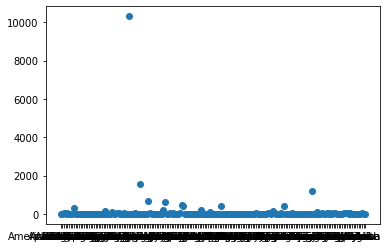

In [32]:
plt.scatter(df_lang.index, df_lang)

                         0
Aboriginal            17.0
Acholi                 5.0
Afrikaans             24.0
Albanian              15.0
AmericanSignLanguage  36.0
...                    ...
Xhosa                 20.0
Yakut                  1.0
Yiddish               46.0
Yoruba                 8.0
Zulu                  17.0

[185 rows x 1 columns]
                  0
English     10318.0
French       1540.0
Spanish      1213.0
German        665.0
Hindi         598.0
Italian       456.0
Japanese      431.0
Mandarin      428.0
Russian       407.0
Arabic        311.0
Hebrew        204.0
Korean        184.0
Portuguese    156.0
Cantonese     146.0
Latin         110.0
Swedish        88.0
Chinese        76.0
Persian        72.0
Greek          69.0
Ukrainian      69.0


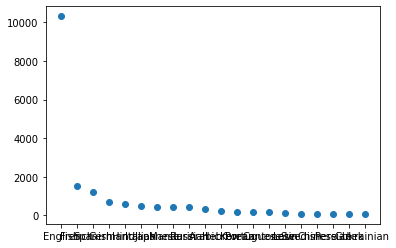

In [33]:
print(df_lang)
#df_lang['0'].idxmax()
#df_lang = df_lang.rename_axis('index').reset_index()

df_lang[0].argmax()
#df_lang.loc[]
import copy
df_lang_test = copy.deepcopy(df_lang)
x = df_lang_test.nlargest(20,0) #df.nlargest(n,columns) columns에 '컬럼이름' 아니고 바로 컬럼이름 써주면됨
print(x)
plt.scatter(x.index, x)

In [34]:
#English 1로 바꾸기.
"""
AmiEnglish = Language_mat.English #추가해주기.
pd.concat([df, AmiEnglish], axis = 1)
"""

'\nAmiEnglish = Language_mat.English #추가해주기.\npd.concat([df, AmiEnglish], axis = 1)\n'

#### Certificate

In [35]:
#Certificate 원핫 인코딩 ㅇㅇ

df["Certificate"] = df["Certificate"].str.replace("[","")
df["Certificate"] = df["Certificate"].str.replace("]","")
df["Certificate"] = df["Certificate"].str.strip()
df["Certificate"] = df["Certificate"].str.replace(" ","")
df["Certificate"] = df["Certificate"].str.replace("'","")
df["Certificate"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Movie_title
American Animals (2018)                   R
Step Up Revolution (2012)             PG-13
Bad News Bears (2005)           TV-14,PG-13
American Assassin (2017)                  R
Ek Thi Daayan (2013)               NotRated
                                   ...     
The Devil's Miner (2005)           NotRated
Madame de... (1953)                NotRated
Paranormal Activity 2 (2010)              R
The Nice Guys (2016)                      R
Reset (2017)                               
Name: Certificate, Length: 12389, dtype: object

In [36]:
#질문
#2. 원핫 인코딩

Certificate_iter = (set(x.split(",")) for x in df.Certificate)
print("Certificate_iter:", Certificate_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Certificate_iter이 

#1)고윳값
Certificate_set = sorted(set.union(*Certificate_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Certificate_set:", Certificate_set)
Unique_Certificate = []
for unique_cert in Certificate_set:
  Unique_Certificate.append(unique_cert.strip()) #띄어쓰기 없애서 다시 고유리스트로 만들기
Unique_Certificate = set(Unique_Certificate) 
Unique_Certificate
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

Certificate_iter: <generator object <genexpr> at 0x7f3efe8fa728>
Certificate_set: ['', '12', 'Approved', 'G', 'GP', 'M', 'M/PG', 'NC-17', 'NotRated', 'PG', 'PG-13', 'Passed', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'Unrated']


{'',
 '12',
 'Approved',
 'G',
 'GP',
 'M',
 'M/PG',
 'NC-17',
 'NotRated',
 'PG',
 'PG-13',
 'Passed',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'TV-Y7-FV',
 'Unrated'}

In [37]:
#2) 0행렬 만들어주기
Certificate_mat = pd.DataFrame(np.zeros((len(df), len(Unique_Certificate))), columns=Unique_Certificate)
Certificate_mat

,,R,TV-MA,TV-PG,G,M,TV-Y7-FV,TV-Y7,TV-G,Approved,GP,PG-13,Unrated,12,NotRated,Passed,M/PG,NC-17,TV-14,PG,TV-Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,116,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","English,Dutch",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",R,14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,99,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",English,['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",PG-13,27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,113,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","English,Spanish",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","TV-14,PG-13",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,65944,112,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","English,Spanish,Arabic,Polish,Turkish,Russian,...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",R,15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,135,NaN,112135,"$65,857, 21 April 2013","$206,279",Hindi,['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",NotRated,15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,82,NaN,14289,"$4,393, 19 March 2006","$14,289",Spanish,"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],NotRated,22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,8544,105,NaN,130561,"$15,409, 18 March 2007","$135,636","French,Turkish",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",NotRated,19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,96796,91,3000000,84752907,"$40,678,424, 24 October 2010","$177,512,032","English,Spanish",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",R,22 October 2010,Paramount Pictures


In [39]:
print(df.shape,Certificate_mat.shape)
#pd.concat([df, Certificate_mat],axis = 1, ignore_index=True)
#index label
#key로 결합
df

(12389, 16) (12389, 21)


,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,116,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","English,Dutch",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",R,14 August 2018,The Orchard
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,99,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",English,['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",PG-13,27 July 2012,Lionsgate
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,113,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","English,Spanish",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","TV-14,PG-13",22 July 2005,Paramount Pictures
American Assassin (2017),7,"Action,Thriller",6.2,65944,112,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","English,Spanish,Arabic,Polish,Turkish,Russian,...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",R,15 September 2017,Lionsgate
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,135,NaN,112135,"$65,857, 21 April 2013","$206,279",Hindi,['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",NotRated,15 September 2017,Eros International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,82,NaN,14289,"$4,393, 19 March 2006","$14,289",Spanish,"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],NotRated,22 February 2019,First Run
Madame de... (1953),135,"Drama,Romance",8.0,8544,105,NaN,130561,"$15,409, 18 March 2007","$135,636","French,Turkish",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",NotRated,19 July 1954,NaN
Paranormal Activity 2 (2010),136,Horror,5.6,96796,91,3000000,84752907,"$40,678,424, 24 October 2010","$177,512,032","English,Spanish",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",R,22 October 2010,Paramount Pictures


In [40]:
Certificate_mat

,,R,TV-MA,TV-PG,G,M,TV-Y7-FV,TV-Y7,TV-G,Approved,GP,PG-13,Unrated,12,NotRated,Passed,M/PG,NC-17,TV-14,PG,TV-Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
for i, certificate in enumerate(df.Certificate):
  
  Certificate_split = certificate.split(',')
  cert_stripped = []

  for cert_stripped_element in Certificate_split:
    cert_stripped.append(cert_stripped_element.strip())
    Certificate_mat.loc[i, cert_stripped_element.strip()] = 1

Certificate_mat #정상 작동.



 

,,R,TV-MA,TV-PG,G,M,TV-Y7-FV,TV-Y7,TV-G,Approved,GP,PG-13,Unrated,12,NotRated,Passed,M/PG,NC-17,TV-14,PG,TV-Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12386,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12387,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Distributor

In [42]:
df.Domestic_distributor

Movie_title
American Animals (2018)                The Orchard
Step Up Revolution (2012)                Lionsgate
Bad News Bears (2005)           Paramount Pictures
American Assassin (2017)                 Lionsgate
Ek Thi Daayan (2013)            Eros International
                                       ...        
The Devil's Miner (2005)                 First Run
Madame de... (1953)                            NaN
Paranormal Activity 2 (2010)    Paramount Pictures
The Nice Guys (2016)                  Warner Bros.
Reset (2017)                                   NaN
Name: Domestic_distributor, Length: 12389, dtype: object

Pandas Series에는 문자열 처리기능 대단!
df.column1은 Series임. 

df['column1'].str.contains()는 특정 문자열있는지 확인.


In [43]:
Big6_dist_list = ["Walt Disney","Warner Bros.","Sony Pictures","Universal","20th Century Fox","Paramount Pictures"] 

In [44]:
def am_i_big6(distributor):
  Big6_dist_list = ["Walt Disney","Warner Bros.","Sony Pictures","Universal","20th Century Fox","Paramount Pictures"] 
  if pd.isnull(distributor):
    return 0
    #np.nan

  if distributor in Big6_dist_list:
    return 1
  else:
    return 0

In [45]:
df['Big6_distributor'] = df['Domestic_distributor'].apply(am_i_big6)
counting1 = df['Big6_distributor'].sum(axis = 0)
counting1 #215개가 big6라함.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


774

In [46]:
#기존 Domestic_distributor 컬럼 지우기
df = df.drop('Domestic_distributor',axis = 1) # pandas 에서 axis = 1 은 컬럼을 얘기하는데,, 컬럼 별이 아니고 걍 컬럼임. --> df.drop('컬럼명',axis = 1)해야 열이 지워짐. axis = 0은 행 지움.


In [47]:
df

,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Big6_distributor
Movie_title,,,,,,,,,,,,,,,,
American Animals (2018),1,"Documentary,Biography,Crime",7.0,35319,116,NaN,2856954,"$134,793, 3 June 2018","$4,080,073","English,Dutch",['Bart Layton'],"['Bart Layton', 'Claudia Zie', 'Ed Wethered', ...","['Spencer Reinhard ...', 'Warren Lipka ...', '...",R,14 August 2018,0
Step Up Revolution (2012),3,"Drama,Music,Romance",6.4,52827,99,33000000,35074677,"$11,731,708, 29 July 2012","$140,470,746",English,['Scott Speer'],"['Amanda Brody', 'Duane Adler']","['Cleopatra Coleman', 'Ryan Guzman', 'Misha Ga...",PG-13,27 July 2012,0
Bad News Bears (2005),4,"Comedy,Sport",5.8,19924,113,35000000,32868349,"$11,382,472, 24 July 2005","$34,252,847","English,Spanish",['Richard Linklater'],"['Bill Lancaster', 'Glenn Ficarra', 'John Requ...","['Billy Bob Thornton', 'Greg Kinnear ...', 'Ma...","TV-14,PG-13",22 July 2005,1
American Assassin (2017),7,"Action,Thriller",6.2,65944,112,33000000,36249674,"$14,846,778, 17 September 2017","$67,234,188","English,Spanish,Arabic,Polish,Turkish,Russian,...",['Michael Cuesta'],"['Stephen Schiff', 'Michael Finch', 'Edward Zw...","[""Dylan O'Brien"", 'Charlotte Vega', 'Christoph...",R,15 September 2017,0
Ek Thi Daayan (2013),13,"Horror,Romance,Thriller",5.7,3770,135,NaN,112135,"$65,857, 21 April 2013","$206,279",Hindi,['Kannan Iyer'],"['Vishal Bhardwaj', 'Vishal Bhardwaj', 'Mukul ...","['Emraan Hashmi', 'Konkona Sen Sharma', 'Kalki...",NotRated,15 September 2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Devil's Miner (2005),134,Documentary,7.6,538,82,NaN,14289,"$4,393, 19 March 2006","$14,289",Spanish,"['Kief Davidson', 'Richard Ladkani']","['Richard Ladkani', 'Kief Davidson']",[],NotRated,22 February 2019,0
Madame de... (1953),135,"Drama,Romance",8.0,8544,105,NaN,130561,"$15,409, 18 March 2007","$135,636","French,Turkish",['Max Oph'],"['Louise de Vilmorin', 'Marcel Achard', 'Max O...","['Charles Boyer', 'Danielle Darrieux', 'Vittor...",NotRated,19 July 1954,0
Paranormal Activity 2 (2010),136,Horror,5.6,96796,91,3000000,84752907,"$40,678,424, 24 October 2010","$177,512,032","English,Spanish",['Tod Williams'],"['Michael R. Perry', 'Christopher Landon', 'To...","['David Bierend', 'Brian Boland', 'Molly Ephra...",R,22 October 2010,1



질문
2. 원핫 인코딩

Distributor_iter = (set(x.split(",")) for x in df.Domestic_distributor)
print("Distributor_iter:", Distributor_iter)
1. 겉 괄호는 무엇인지? generator 찾아보기. 
2. Genre_iter이 

1)장르 고윳값 ex Action, Horror 등만 추출
Distributor_set = sorted(set.union(*Distributor_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Genre_set:", Distributor_set)
 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

2) 0행렬 만들어주기
Genre_mat = pd.DataFrame(np.zeros((len(df), len(Genre_set))), columns=Genre_set)
Genre_mat

해당하는 Genre에 1 채워주기. 논리? 이해 완료.
for i, genre in enumerate(df.Genre):
  Genre_mat.loc[i, genre.split(',')] = 1
  #print(Genre_mat.loc[i, genre.split(',')]) #if 안쓰고도 df.loc[i행,[컬럼1,컬럼2]]하면 df에서 해당하는 컬럼1,2에 접근 가능.
  #print(genre.split(',')) #['Documentary', ' Biography', ' Crime'] 이런식으로 나옴.
Genre_mat

### Opening weekend_USA

In [48]:
#0. nan 검출
len(df['Opening Weekend USA'])
df[df['Opening Weekend USA'].isnull()]



,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Big6_distributor
Movie_title,,,,,,,,,,,,,,,,
Peace Officer (2015),21,"Documentary,Crime",7.4,416,105,NaN,26632,NaN,"$26,632",English,"['Brad Barber', 'Scott Christopherson']","['Brad Barber', 'Scott Christopherson', 'David...","['Radley Balko', ""William 'Dub' Lawrence""]",NotRated,7 October 2011,0
The Amendment (2018),115,Action,7.0,32,90,2000000,27961,NaN,"$27,961",English,['Paul Brown'],"['Paul Brown', 'Brooks Douglass']","['Mike Vogel', 'Taryn Manning', 'Silas Weir Mi...",PG-13,6 April 2012,0
Love Is the Drug (2006),136,Drama,5.5,674,96,NaN,NaN,NaN,NaN,English,['Elliott Lester'],"['Wesley Strick', 'Steve Allison', 'Wesley Str...","['John Patrick Amedori', 'Lizzy Caplan', 'D.J....",R,6 October 2006,0
The Last Film Festival (2016),142,Comedy,3.9,273,90,650000,3558,NaN,"$3,558",English,['Linda Yellen'],"['Linda Yellen', 'Michael Leeds']","['Dennis Hopper', 'Chris Kattan', 'Jacqueline ...",R,18 May 2018,0
Look Away (2018),147,"Fantasy,Horror,Thriller",6.0,12941,103,NaN,NaN,NaN,"$1,119,537",English,['Assaf Bernstein'],['Assaf Bernstein'],"['India Eisley', 'Jason Isaacs', 'Mira Sorvino...",TV-MA,12 October 2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fukushû suru wa ware ni ari (1979),111,"Crime,Drama",7.8,5636,140,NaN,11891,NaN,"$11,891","Japanese,English",['Sh'],"['Masaru Baba', 'Ryûzô Saki', 'Shunsaku Ikehata']","['Ken Ogata', 'Ken Ogata ... Iwao Enokizu', 'R...",NotRated,17 October 1979,0
Werk ohne Autor (2018),114,"Biography,Drama,Romance",7.7,12991,189,NaN,1304042,NaN,"$6,192,657","German,Russian",['Florian Henckel von Donnersmarck'],['Florian Henckel von Donnersmarck'],"['Tom Schilling', 'Sebastian Koch', 'Paula Bee...",R,30 November 2018,0
Gekijouban K: Missing Kings (2014),117,"Animation,Action,Fantasy",7.1,721,73,NaN,33531,NaN,"$826,323",Japanese,['Shingo Suzuki'],[],"['Daisuke Namikawa', 'Daisuke Ono', 'Tomokazu ...",TV-14,18 July 2014,0


In [49]:
#ㅇ여역여기 .group() 1,3ㅇ으을으로 ㅂ바밖바꾸꿈꾸며면 ㄷ도되된되느는늕는제 ㅊ

def split_ow_sales(opening_weekend_sales):

  if pd.isnull(opening_weekend_sales):
    return np.nan

  else:
    m = re.search('(\$.*, )(.*)', df['Opening Weekend USA'])
    return m.group(1)  

def split_ow_date(opening_weekend_date):
  if pd.isnull(opening_weekend_date):
    return np.nan
  
  else:
    m = re.search('(\$.*, )(.*)', df['Opening Weekend USA'])
    return m.group(2)

df['Opening Weekend sales'] = df['Opening Weekend USA'].apply(split_ow_sales)
df['Opening Weekend date'] = df['Opening Weekend USA'].apply(split_ow_date)

TypeError: ignored

In [ ]:
#1.매출, 일자 분리 using RE

opening_weekend_sales = ''
opening_weekend_date = ''
df['Opening Weekend sales'] = opening_weekend_sales
df['Opening Weekend date'] = opening_weekend_date 

for i in range(len(df['Opening Weekend USA'])):
  try:
    m = re.search('(\$.*)(, )(.*)', df['Opening Weekend USA'][i])
    print(m.group(1))
    print(m.group(3))
    df['Opening Weekend sales'][i] =str(m.group(1))  
    df['Opening Weekend date'][i] = str(m.group(3))
    
  except TypeError:
    continue

  if i % 100 == 0:
    print(f'{i} laps')

## Stars,Writers, Directors 수상여부 찾기. 코드 맨 밑에 넣기 + 하면 df바로 저장해야함. (연산처리 시간 많이 걸림)

In [ ]:
# empty columns

#노미니,위너 빈 컬럼 생성
df["nominated_stars"] = 0 
df["winner_stars"] = 0 
df["nominated_writers"] = 0 
df["winner_writers"] = 0 
df["nominated_directors"] = 0
df["winner_directors"] = 0
df

#시간이 많이 걸린다면 .이 들어간걸 for 밖으로 뺄 생각하셈.

### Stars 영화 수상 여부





In [50]:
#Stars 영화 수상 여부 확인


for n in range(len(df.index)): #영화접근
  #우선 ' ... ' cleansing 
  star_list = literal_eval(df['Stars'].iloc[n]) #n번째 행(영화) 행자리임 바꾸삼

  for i in range(len(star_list)): # n번째 영화안의 i번째 배우    
    #정규 표현식으로 각 배우' ... ' 없애기.
    try:
      m = re.search(r'(.*)\.\.\.(.*)',star_list[i]) # ( ... )는 띄어쓰기+ 모든문자(점 포함) 세번+띄어쓰기 매칭하는거.
      star = m.group(1)

    except: #이미 정상이어서 정규표현식이 안통하는 애들
      star = star_list[i]

    #Star 한명의 수상이력
    ia = IMDb()
    try:
      Person_Id = ia.search_person(star)[0].personID #검색되는 0번째 star check
    except IndexError:
      continue #2020 4월 기준 ID도 없는 배우는 제외.
    Awards = ['Golden Globes, USA', 'Academy Awards, USA']

    #len(ia.get_person_awards(Person_Id).get('data').get('awards'))
    if ia.get_person_awards(Person_Id).get('data').get('awards') == None:
      continue #수상 정보 없으므로 다음 배우로 
    else:
      award_records_no = len(ia.get_person_awards(Person_Id).get('data').get('awards'))
      award_records = ia.get_person_awards(Person_Id).get('data').get('awards')
      #print(award_records)

      df['Released_date'] = pd.to_datetime(df['Released_date']) #df['컬럼명'] = pd.to_datetime(df['컬럼명'])
      agg_award_year = df['Released_date'].dt.year[n] - 1 #n번째 영화니까  #agg_award_year = df['Released_date'].dt.year[n] - 1 #n번째 영화니까 ** else 다하고 바꾸기

      for record_no in range(award_records_no): #한 영화 안에서 배우한명의 record
        try:
          #print(award_records[record_no])
          awarded_year = award_records[record_no]['year'] #수상 연도
        except KeyError: #year 없어요
          try:
            awarded_year = ia.search_movie(str(award_records[record_no]['movies']))[0]['year']
          except: #연도고 영화 제목이고 정보 없음
            continue

        right_year = awarded_year <= agg_award_year
        right_award = award_records[record_no]['award'] in Awards 

        if right_year and right_award : # 조건1 연도  충족 시 조건2 - 골든 글로브/acdemy award수상하는지
          
          #노미니인지 승자인지?
          if ia.get_person_awards(Person_Id).get('data').get('awards')[0]['result'] == 'Nominee': #Nominee인 경우 Nominee칼럼에 1
            df["nominated_stars"].iloc[n] = 1  
          elif ia.get_person_awards(Person_Id).get('data').get('awards')[0]['result'] == 'Winner':
            df["winner_stars"].iloc[n] = 1   

        else:
          continue #다음 이력
#500개 오전11:15 - 


NameError: ignored

### Directors 영화 수상 여부



In [ ]:
for n in range(len(df.index)): #영화접근
  #우선 ' ... ' cleansing 
  director_list = literal_eval(df['Directors'].iloc[n]) #n번째 행(영화) 행자리임 바꾸삼

  for i in range(len(director_list)): # n번째 영화안의 i번째 감독    
    #정규 표현식으로 각 감독' ... ' 없애기.
    try:
      m = re.search(r'(.*)\.\.\.(.*)',director_list[i]) # ( ... )는 띄어쓰기+ 모든문자(점 포함) 세번+띄어쓰기 매칭하는거.
      director = m.group(1)

    except: #이미 정상이어서 정규표현식이 안통하는 애들
      director = director_list[i]

    #Star 한명의 수상이력
    ia = IMDb()
    try:
      Person_Id = ia.search_person(director)[0].personID #검색되는 0번째 star check
    except IndexError:
      continue #2020 4월 기준 ID도 없는 배우는 제외.
    Awards = ['Golden Globes, USA', 'Academy Awards, USA']

    #len(ia.get_person_awards(Person_Id).get('data').get('awards'))
    if ia.get_person_awards(Person_Id).get('data').get('awards') == None:
      continue #수상 정보 없으므로 다음 감독으로 
    else:
      award_records_no = len(ia.get_person_awards(Person_Id).get('data').get('awards'))
      award_records = ia.get_person_awards(Person_Id).get('data').get('awards')
      #print(award_records)

      df['Released_date'] = pd.to_datetime(df['Released_date']) #df['컬럼명'] = pd.to_datetime(df['컬럼명'])
      agg_award_year = df['Released_date'].dt.year[n] - 1 #n번째 영화니까  #agg_award_year = df['Released_date'].dt.year[n] - 1 #n번째 영화니까 ** else 다하고 바꾸기

      for record_no in range(award_records_no): #한 영화 안에서 배우한명의 record
        try:
          #print(award_records[record_no])
          awarded_year = award_records[record_no]['year'] #수상 연도
          right_year = awarded_year <= agg_award_year
          right_award = award_records[record_no]['award'] in Awards 

          if right_year and right_award : #연도 조건 충족 시 (조건1), 조건2 - 골든 글로브/acdemy award수상하는지
            
            #노미니인지 승자인지?
            if ia.get_person_awards(Person_Id).get('data').get('awards')[0]['result'] == 'Nominee': #Nominee인 경우 Nominee칼럼에 1
              df["nominated_directors"].iloc[n] = 1  
            elif ia.get_person_awards(Person_Id).get('data').get('awards')[0]['result'] == 'Winner':
              df["winner_directors"].iloc[n] = 1   

          else:
            continue #다음 이력

        except KeyError: #year 없어요
          try:
            awarded_year = ia.search_movie(str(award_records[record_no]['movies']))[0]['year']
          except: #연도고 영화 제목이고 정보 없음
            continue

          #continue 3:35분 500개 시작 

### Writers 영화 수상 여부

In [ ]:
#Writer

for n in range(len(df.index)): #영화접근
  #우선 ' ... ' cleansing 
  writer_list = literal_eval(df['Writers'].iloc[n]) #n번째 행(영화) 행자리임 바꾸삼

  for i in range(len(writer_list)): # n번째 영화안의 i번째 감독    
    #정규 표현식으로 각 작가' ... ' 없애기.
    try:
      m = re.search(r'(.*)\.\.\.(.*)',writer_list[i]) # ( ... )는 띄어쓰기+ 모든문자(점 포함) 세번+띄어쓰기 매칭하는거.
      writer = m.group(1)

    except: #이미 정상이어서 정규표현식이 안통하는 애들
      writer = writer_list[i]

    #Star 한명의 수상이력
    ia = IMDb()
    try:
      Person_Id = ia.search_person(writer)[0].personID #검색되는 0번째 star check
    except IndexError:
      continue #2020 4월 기준 ID도 없는 작가는 제외.
    Awards = ['Golden Globes, USA', 'Academy Awards, USA']

    #len(ia.get_person_awards(Person_Id).get('data').get('awards'))
    if ia.get_person_awards(Person_Id).get('data').get('awards') == None:
      continue #수상 정보 없으므로 다음 작가로 
    else:
      award_records_no = len(ia.get_person_awards(Person_Id).get('data').get('awards'))
      award_records = ia.get_person_awards(Person_Id).get('data').get('awards')
      #print(award_records)

      df['Released_date'] = pd.to_datetime(df['Released_date']) #df['컬럼명'] = pd.to_datetime(df['컬럼명'])
      agg_award_year = df['Released_date'].dt.year[n] - 1 #n번째 영화니까  #agg_award_year = df['Released_date'].dt.year[n] - 1 #n번째 영화니까 ** else 다하고 바꾸기

      for record_no in range(award_records_no): #한 영화 안에서 작가 한명의 record
        try:
          #print(award_records[record_no])
          awarded_year = award_records[record_no]['year'] #수상 연도
          right_year = awarded_year <= agg_award_year
          right_award = award_records[record_no]['award'] in Awards 

          if right_year and right_award : #연도 조건 충족 시 (조건1), 조건2 - 골든 글로브/acdemy award수상하는지
            
            #노미니인지 승자인지?
            if ia.get_person_awards(Person_Id).get('data').get('awards')[0]['result'] == 'Nominee': #Nominee인 경우 Nominee칼럼에 1
              df["nominated_writers"].iloc[n] = 1  
            elif ia.get_person_awards(Person_Id).get('data').get('awards')[0]['result'] == 'Winner':
              df["winner_writers"].iloc[n] = 1   

          else:
            continue #다음 이력

        except KeyError: #year 없어요
          try:
            awarded_year = ia.search_movie(str(award_records[record_no]['movies']))[0]['year']
          except: #연도고 영화 제목이고 정보 없음
            continue
        #except:
          #continue

NameError: ignored

## ## Stars,Writers, Directors 캐글데이터 활용

In [ ]:
#로드하는 코드

with open("/gdrive/My Drive/movie_predict/golden globe, academy file/star_winner.pickle","rb") as fr:
  star_winner = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/star_nominee.pickle","rb") as fr:
  star_nominee = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/director_winner.pickle","rb") as fr:
  director_winner = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/director_nominee.pickle","rb") as fr:
  director_nominee = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/writer_winner.pickle","rb") as fr:
  writer_winner = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/writer_nominee.pickle","rb") as fr:
  writer_nominee = pickle.load(fr)

In [ ]:
#Cumulative Worldwide Gross
df["Cumulative Worldwide Gross"] = df["Cumulative Worldwide Gross"].str.replace("$","")
df["Cumulative Worldwide Gross"] = df["Cumulative Worldwide Gross"].str.replace(",","")

df

In [ ]:
#Opening Weekend USA 보류
"""
df["Opening Weekend USA"] = df["Opening Weekend USA"].str.replace("$","")
df["Opening Weekend USA"] = df["Opening Weekend USA"].str.replace("'","")
df["Opening Weekend USA"] = df["Opening Weekend USA"].str.replace(",","")
"""
"""
#Directors	
df["Directors"] = df["Directors"].str.replace("[","")
df["Directors"] = df["Directors"].str.replace("]","")
df["Directors"] = df["Directors"].str.replace("'","")

#Writers	
df["Writers"] = df["Writers"].str.replace("[","")
df["Writers"] = df["Writers"].str.replace("]","")
df["Writers"] = df["Writers"].str.replace("'","")
#Stars
df["Stars"] = df["Stars"].str.replace("[","")
df["Stars"] = df["Stars"].str.replace("]","")
df["Stars"] = df["Stars"].str.replace("'","")

#Certificate
df["Certificate"] = df["Certificate"].str.replace("'","")
df.head()
"""
#Domestic_distributor 원핫인코딩.


### Genre, Certificate,Language 원핫 추가해주기

In [ ]:
Genre_mat, Certificate_mat

In [ ]:
# 1. Language 더해주기
print(df.shape,Language_mat.English.shape)

In [ ]:
Eng = Language_mat.English.to_frame()
Eng["key"] = df.index
df["key"] = df.index

#중복값 없애고 밑에 실행.
#df = pd.merge(df, Eng, on = "key")
#df
#19391개의 데이터 생성.. 왜?

In [ ]:
df

In [ ]:
#중복값 check
df[df.duplicated(["key"])]

In [ ]:
df[df.key == "The Look (2011)"]

In [ ]:
#df,Genre_mat결합

#merge사용 위해 key 맞춰주기

#1. df키 만들어주기
df['key'] = df.index

#2. Genre_mat key 만들어주기 
Genre_mat['key'] = df.index
#pd.merge(df,Genre_mat)

#3. 
df_merged = pd.merge(df,Genre_mat, on = 'key')
#19000개가 생김. 같은 영화인데 다른 index들이 많아서임.
df_merged

In [ ]:
df.loc['Titanic (1997)']

Unnamed: 0                                                                  276
Genre                                                      ['Drama', 'Romance']
Rate                                                                    ['7.8']
Rating_count                                                          1,017,939
Run_time                                                           ['3h 14min']
Budget                                                 $200,000,000 (estimated)
Gross_USA                                                          $659,363,944
Opening Weekend USA                               $28,638,131, 21 December 1997
Cumulative Worldwide Gross                                       $2,196,043,167
Language                      ['English ', ' Swedish ', ' Italian ', ' French']
Directors                                                     ['James Cameron']
Writers                                                       ['James Cameron']
Stars                         ['Leonardo

### 추가적으로 점검

In [ ]:
# 나중에  점검.
#1. 학습 시 released year은 제외한다.
#2. 원핫인코딩한 Certificate, Genre 점검
#3. Domestic_distributor 컬럼 지우기
#4.

In [ ]:
for i in range(len(df.index)):
  if df.index[i] == "nan"
  print(df.index[i])

In [ ]:
df.loc[0]

In [ ]:
null_movie = df.index.isnull()
df[null_movie]

In [ ]:
df.loc[0] #안됨. 인덱스가 영화이름이기때문.

In [ ]:
ia = IMDb()
Person_Id = ia.search_person('leonardo dicaprio')[0].personID #검색되는 0번째 star check
Awards = ['Golden Globes, USA', 'Academy Awards, USA']

#len(ia.get_person_awards(Person_Id).get('data').get('awards'))
if ia.get_person_awards(Person_Id).get('data').get('awards') == None:
  pass #수상 정보 없으므로 다음 배우로 
else:
  award_records_no = len(ia.get_person_awards(Person_Id).get('data').get('awards'))
  award_records = ia.get_person_awards(Person_Id).get('data').get('awards')
  for record in range(award_records_no):
    print(award_records[record])
    print(award_records[record]['movies'])

{'year': 2020, 'result': 'Nominee', 'prize': 'Oscar', 'category': 'Best Performance by an Actor in a Leading Role', 'movies': <Movie id:7131622[http] title:_Once Upon a Time... in Hollywood (2019)_>, 'award': 'Academy Awards, USA'}
Once Upon a Time... in Hollywood
{'year': 2016, 'result': 'Winner', 'prize': 'Oscar', 'category': 'Best Performance by an Actor in a Leading Role', 'movies': <Movie id:1663202[http] title:_The Revenant (2015)_>, 'award': 'Academy Awards, USA'}
The Revenant
{'year': 2014, 'result': 'Nominee', 'prize': 'Oscar', 'category': 'Best Performance by an Actor in a Leading Role', 'movies': <Movie id:0993846[http] title:_The Wolf of Wall Street (2013)_>, 'award': 'Academy Awards, USA'}
The Wolf of Wall Street
{'category': 'Best Motion Picture of the Year', 'movies': <Movie id:0993846[http] title:_The Wolf of Wall Street (2013)_>, 'award': 'Academy Awards, USA', 'shared with': <Person id:0000217[http] name:_Martin Scorsese_>}
The Wolf of Wall Street
{'year': 2007, 'resu

KeyError: ignored

In [ ]:
ia = IMDb()
Person_Id = ia.search_person('leonardo dicaprio')[0].personID #검색되는 0번째 star check
Awards = ['Golden Globes, USA', 'Academy Awards, USA']

#len(ia.get_person_awards(Person_Id).get('data').get('awards'))
if ia.get_person_awards(Person_Id).get('data').get('awards') == None:
  pass #수상 정보 없으므로 다음 배우로 
else:
  award_records_no = len(ia.get_person_awards(Person_Id).get('data').get('awards'))
  award_records = ia.get_person_awards(Person_Id).get('data').get('awards')
  print(award_records[0])

{'year': 2020, 'result': 'Nominee', 'prize': 'Oscar', 'category': 'Best Performance by an Actor in a Leading Role', 'movies': <Movie id:7131622[http] title:_Once Upon a Time... in Hollywood (2019)_>, 'award': 'Academy Awards, USA'}
